In [27]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# sun_power = pd.read_excel('sun_power.xlsx', header=-5)
sun_df = pd.read_excel('sun_power.xlsx',parse_dates=['Unnamed: 1'], skiprows=5)
weather_h = pd.read_excel('weather.xlsx', parse_dates=['일시'])
weather_m = pd.read_excel('weather.xlsx', parse_dates=['일시'], sheet_name='1분 단위 Data')

In [28]:
sun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 84 columns):
Unnamed: 0    0 non-null float64
Unnamed: 1    576 non-null object
일사량           577 non-null object
외기온도          577 non-null object
모듈온도          577 non-null object
총 전력(AC)      577 non-null object
DC전압          577 non-null object
DC전류          577 non-null object
DC전력          577 non-null object
R상 전압         577 non-null object
S상 전압         577 non-null object
T상 전압         577 non-null object
R상 전류         577 non-null object
S상 전류         577 non-null object
T상 전류         577 non-null object
AC전력          577 non-null object
전압            577 non-null object
전류            577 non-null object
전압.1          577 non-null object
전류.1          577 non-null object
전압.2          577 non-null object
전류.2          577 non-null object
전압.3          577 non-null object
전류.3          577 non-null object
전압.4          577 non-null object
전류.4          577 non-null object
전압.5        

## 전처리(col, row 날리기)

In [29]:

# wando[wando['최고기온(°C)'].isnull()].index
# [출처] Null(결측치) 값 인덱스 찾기|작성자 감귤

In [30]:
sun_df.head(2)

,Unnamed: 0,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,NaN,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]
1,NaN,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [31]:
sun_df = sun_df.drop(sun_df.columns[0], axis=1)
sun_df.head(1)

,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]


In [32]:
sun_df = sun_df.drop(sun_df.index[0])
sun_df.head(1)

,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
1,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [5]:
sun_df.drop('일사량', axis=1, inplace=True)
sun_df.head(1)

,Unnamed: 1,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,T상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
1,03-01 00:00:00,0.6,0.579175,0,5.24146,0,0,336.201,333.922,332.048,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [6]:
weather_m.drop('지점', axis=1, inplace=True)
weather_h.drop('지점', axis=1, inplace=True)

In [7]:
weather_h.head(1)

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위)
0,03-01 00:00:00,3.1,0.5,3.6,340,96,1001.3,NaN,NaN,NaN,NaN


In [8]:
weather_m.head(1)

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,03-01 00:01:00,3.0,0.0,345.3,3.2,1001.4,1005.0,95.6,0.0,0


In [9]:
sun_df.rename(columns={sun_df.columns[0]:"일시"}, inplace=True)

In [10]:
sun_df.head(1)

,일시,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,T상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
1,03-01 00:00:00,0.6,0.579175,0,5.24146,0,0,336.201,333.922,332.048,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0


In [ ]:
sun_df

In [80]:
sun_df['Unnamed: 1'].head(2)

1     03-01  00:00:00
2     03-01  00:15:00
Name: Unnamed: 1, dtype: object

In [82]:
sun_df[[sun_df.columns[0]]]

,Unnamed: 1
1,03-01 00:00:00
2,03-01 00:15:00
3,03-01 00:30:00
4,03-01 00:45:00
5,03-01 01:00:00
6,03-01 01:15:00
7,03-01 01:30:00
8,03-01 01:45:00
9,03-01 02:00:00
10,03-01 02:15:00


## Merge : sun - weather 

In [11]:
df = pd.merge(weather_m, sun_df, how='inner')

## Merge : 검증

merge한 df길이와 sun_df 길이가 달랐다. 분명 무슨 자료가 빠졌다

In [12]:
weather_m['일시'].isnull().sum()

0

In [13]:
sun_df['일시'].isnull().sum()

0

In [14]:
len(weather_m)

8636

In [15]:
len(sun_df), len(df)

(576, 574)

    왜 이럴까? 
    -- 기상데이터(weather_m)에 4개 값이 빠져있음 
    -- 결측치가 아니니 헷갈렸다

In [16]:
df.columns

Index(['일시', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)', '외기온도', '모듈온도',
       '총 전력(AC)', 'DC전압', 'DC전류', 'DC전력', 'R상 전압', 'S상 전압', 'T상 전압', 'R상 전류',
       'S상 전류', 'T상 전류', 'AC전력', '전압', '전류', '전압.1', '전류.1', '전압.2', '전류.2',
       '전압.3', '전류.3', '전압.4', '전류.4', '전압.5', '전류.5', '전압.6', '전류.6', '전압.7',
       '전류.7', '전압.8', '전류.8', '전압.9', '전류.9', '전압.10', '전류.10', '전압.11',
       '전류.11', '전압.12', '전류.12', '전압.13', '전류.13', '전압.14', '전류.14', '전압.15',
       '전류.15', 'DC전압.1', 'DC전류.1', 'DC전력.1', 'R상 전압.1', 'S상 전압.1', 'T상 전압.1',
       'R상 전류.1', 'S상 전류.1', 'T상 전류.1', 'AC전력.1', '전압.16', '전류.16', '전압.17',
       '전류.17', '전압.18', '전류.18', '전압.19', '전류.19', '전압.20', '전류.20', '전압.21',
       '전류.21', '전압.22', '전류.22', '전압.23', '전류.23', '전압.24', '전류.24', '전압.25',
       '전류.25', '전압.26', '전류.26', '전압.27', '전류.27', '전압.28', '전류.28'],
      dtype='object')

In [17]:
df = df[df['총 전력(AC)'] != 0]

In [18]:
df.reset_index(inplace=True)

In [19]:
df.drop('index', axis=1, inplace=True)

In [20]:
len(df)

256

In [21]:
df.head()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,03-01 08:00:00,1.0,1.8,323.3,8.1,1006.3,1009.9,82.4,0.05,0,...,684.251,0.121517,685.028,0.160272,651.324,0.0178046,650.368,0.2,655.004,0.0365714
1,03-01 08:15:00,0.9,1.8,311.9,6.7,1006.8,1010.4,76.8,0.13,180,...,679.764,0.217171,679.51,0.220412,686.923,0.22527,684.861,0.396524,690.872,0.374267
2,03-01 08:30:00,0.6,1.8,320.7,6.5,1007.5,1011.1,74.8,0.27,1080,...,674.497,0.683355,674.682,0.685552,684.33,0.74578,683.681,0.781688,687.771,0.755135
3,03-01 08:45:00,0.7,1.8,324.4,7.7,1007.8,1011.4,74.2,0.48,1980,...,651.594,0.896186,651.48,0.99181,735.44,0.936347,734.303,0.91872,739.412,0.910791
4,03-01 09:00:00,0.3,1.8,300.1,9.2,1008.2,1011.8,70.6,0.74,2880,...,713.569,1.2512,713.992,2.70951,728.913,2.78955,725.87,2.77604,729.903,2.65572


In [22]:
date = df['일시']

In [23]:
df.drop('일시', axis=1, inplace=True)

## 셋 분리

In [24]:
len(df)

256

In [25]:
256*0.75

192.0

In [26]:
train = df.iloc[0:192]
test = df.iloc[192:]

In [27]:
train=train.astype(float)
test=test.astype(float)

In [28]:
df.columns

Index(['기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)', '해면기압(hPa)',
       '습도(%)', '일사(MJ/m^2)', '일조(Sec)', '외기온도', '모듈온도', '총 전력(AC)', 'DC전압',
       'DC전류', 'DC전력', 'R상 전압', 'S상 전압', 'T상 전압', 'R상 전류', 'S상 전류', 'T상 전류',
       'AC전력', '전압', '전류', '전압.1', '전류.1', '전압.2', '전류.2', '전압.3', '전류.3',
       '전압.4', '전류.4', '전압.5', '전류.5', '전압.6', '전류.6', '전압.7', '전류.7', '전압.8',
       '전류.8', '전압.9', '전류.9', '전압.10', '전류.10', '전압.11', '전류.11', '전압.12',
       '전류.12', '전압.13', '전류.13', '전압.14', '전류.14', '전압.15', '전류.15', 'DC전압.1',
       'DC전류.1', 'DC전력.1', 'R상 전압.1', 'S상 전압.1', 'T상 전압.1', 'R상 전류.1',
       'S상 전류.1', 'T상 전류.1', 'AC전력.1', '전압.16', '전류.16', '전압.17', '전류.17',
       '전압.18', '전류.18', '전압.19', '전류.19', '전압.20', '전류.20', '전압.21', '전류.21',
       '전압.22', '전류.22', '전압.23', '전류.23', '전압.24', '전류.24', '전압.25', '전류.25',
       '전압.26', '전류.26', '전압.27', '전류.27', '전압.28', '전류.28'],
      dtype='object')

In [29]:
X_train = train.drop('총 전력(AC)', axis=1)
y_train = train[['총 전력(AC)']]

X_test = test.drop('총 전력(AC)', axis=1)
y_test = test[['총 전력(AC)']]

## 스케일

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [31]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [32]:
y_train_s = scaler2.fit_transform(y_train)
y_test_s = scaler2.transform(y_test)

## RandomForestRegression

In [33]:
X_train.head(1)

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),외기온도,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,1.0,1.8,323.3,8.1,1006.3,1009.9,82.4,0.05,0.0,-0.504916,...,684.250854,0.121517,685.028015,0.160272,651.323975,0.017805,650.368103,0.2,655.004272,0.036571


In [34]:
from sklearn.ensemble import RandomForestRegressor

RF2 = RandomForestRegressor(n_estimators=1000, max_features=89, max_depth=20, min_samples_split=3,min_samples_leaf=2, random_state=42, verbose = 2)

In [35]:
RF2.fit(X_train_s, y_train_s)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1

building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000
building tree 456 of 1000
building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000
building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000
building tree 465 of 1000
building tree 466 of 1000
building tree 467 of 1000
building tree 468 of 1000
building tree 469 of 1000
building tre

building tree 754 of 1000
building tree 755 of 1000
building tree 756 of 1000
building tree 757 of 1000
building tree 758 of 1000
building tree 759 of 1000
building tree 760 of 1000
building tree 761 of 1000
building tree 762 of 1000
building tree 763 of 1000
building tree 764 of 1000
building tree 765 of 1000
building tree 766 of 1000
building tree 767 of 1000
building tree 768 of 1000
building tree 769 of 1000
building tree 770 of 1000
building tree 771 of 1000
building tree 772 of 1000
building tree 773 of 1000
building tree 774 of 1000
building tree 775 of 1000
building tree 776 of 1000
building tree 777 of 1000
building tree 778 of 1000
building tree 779 of 1000
building tree 780 of 1000
building tree 781 of 1000
building tree 782 of 1000
building tree 783 of 1000
building tree 784 of 1000
building tree 785 of 1000
building tree 786 of 1000
building tree 787 of 1000
building tree 788 of 1000
building tree 789 of 1000
building tree 790 of 1000
building tree 791 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=89, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=2, warm_start=False)

In [36]:
pre_R2 = RF2.predict(X_test_s)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test_s, pre_R2)

6.201027223058905e-05

In [39]:
import math
import numpy as np

In [40]:
rmse = np.sqrt(mean_squared_error(y_test_s, pre_R2))
rmse

0.007874660134290815

## 원래 값 알아보기

In [41]:
RF3 = RandomForestRegressor(n_estimators=1000, max_features=89, max_depth=20, min_samples_split=3,min_samples_leaf=2, random_state=42, verbose = 2)

In [42]:
RF3.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 10

building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tre

building tree 737 of 1000
building tree 738 of 1000
building tree 739 of 1000
building tree 740 of 1000
building tree 741 of 1000
building tree 742 of 1000
building tree 743 of 1000
building tree 744 of 1000
building tree 745 of 1000
building tree 746 of 1000
building tree 747 of 1000
building tree 748 of 1000
building tree 749 of 1000
building tree 750 of 1000
building tree 751 of 1000
building tree 752 of 1000
building tree 753 of 1000
building tree 754 of 1000
building tree 755 of 1000
building tree 756 of 1000
building tree 757 of 1000
building tree 758 of 1000
building tree 759 of 1000
building tree 760 of 1000
building tree 761 of 1000
building tree 762 of 1000
building tree 763 of 1000
building tree 764 of 1000
building tree 765 of 1000
building tree 766 of 1000
building tree 767 of 1000
building tree 768 of 1000
building tree 769 of 1000
building tree 770 of 1000
building tree 771 of 1000
building tree 772 of 1000
building tree 773 of 1000
building tree 774 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=89, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=2, warm_start=False)

In [43]:
origin_pre = RF3.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [44]:
y_test_for_df = y_test.values
y_test_for_df = pd.DataFrame(y_test_for_df)

In [45]:
y_test_for_df.columns =['y_origin']
y_test_for_df.head(2)

,y_origin
0,1937.845459
1,2816.997314


In [46]:
origin_y = pd.DataFrame(origin_pre)
origin_y.columns =['prediction']
origin_y.head()

,prediction
0,1932.726438
1,2842.567030
2,2818.873853
3,2730.006132
4,1869.543810


In [47]:
good = pd.concat([origin_y, y_test_for_df], axis=1)
good

,prediction,y_origin
0,1932.726438,1937.845459
1,2842.567030,2816.997314
2,2818.873853,2778.321045
3,2730.006132,2683.723877
4,1869.543810,1843.564453
5,2659.260577,2647.346924
6,2480.379976,2453.637207
7,2415.659704,2380.997070
8,2286.689156,2257.005127
9,2168.780201,2127.055908


## 시각화

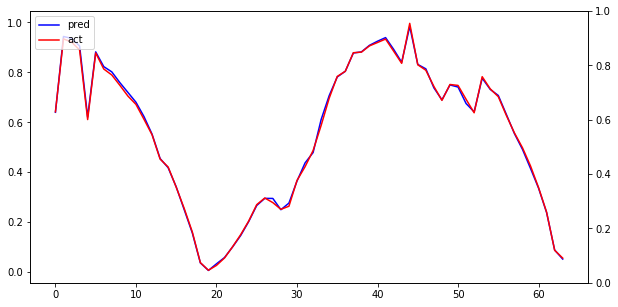

In [48]:
fig, loss_ax = plt.subplots(figsize=(10,5))


acc_ax = loss_ax.twinx()


pred = pre_R2


loss_ax.plot(pred, 'b', label='pred')


loss_ax.plot(y_test_s, 'r', label='act')


loss_ax.legend(loc='upper left')


plt.show()